In [23]:
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk
gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

2023-06-25 09:36:54.127 | INFO     | gdsfactory.technology.layer_views:__init__:785 - Importing LayerViews from YAML file: 'C:\\Users\\lkk12\\miniconda3\\envs\\py310\\lib\\site-packages\\gdsfactory\\generic_tech\\layer_views.yaml'.
2023-06-25 09:36:54.154 | INFO     | gdsfactory.pdk:activate:266 - 'generic' PDK is now active


In [6]:
# Create some new geometry from the functions available in the geometry library
t = gf.components.text("Hello!")
r = gf.components.rectangle(size=[5, 10], layer=(2, 0))

# Add references to the new geometry to c, our blank component
text1 = c.add_ref(t)  # Add the text we created as a reference
# Using the << operator (identical to add_ref()), add the same geometry a second time
text2 = c << t
r = c << r  # Add the rectangle we created

# Now that the geometry has been added to "c", we can move everything around:
text1.move([25, 0])
text2.move([5, 30])


ComponentReference (parent Component "text_textHello", ports [], origin (5.0, 30.0), rotation 0.0, x_reflection False)

In [28]:
c.write_gds("UHQR.gds")

2023-06-24 21:50:51.936 | INFO     | gdsfactory.component:_write_library:1946 - Wrote to 'UHQR.gds'


WindowsPath('UHQR.gds')

In [14]:
mmi.ports

{
    'o1': Port (name o1, center [6.123234e-16 0.000000e+00], width 0.5, orientation 180.0, layer (1, 0), port_type optical),
    'o2': Port (name o2, center [10. 10.], width 0.5, orientation 90.0, layer (1, 0), port_type optical)
}

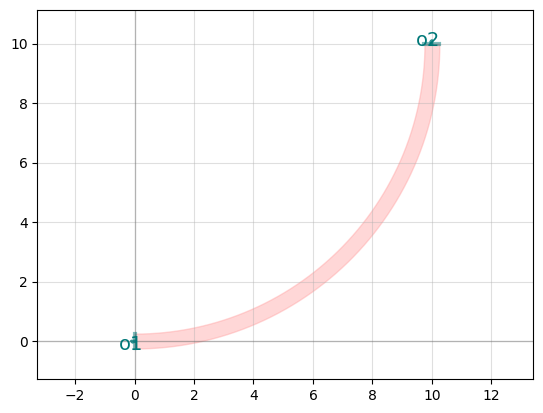

In [13]:
c = gf.Component()
mmi = c << gf.components.bend_circular()
c.plot_matplotlib()

In [36]:
c

2023-06-25 09:42:23.879 | WARNING  | gdsfactory.config:showwarning:58 - Component 'Unnamed_de7ff826' contains 1 Unnamed cells
2023-06-25 09:42:24.066 | INFO     | gdsfactory.klive:show:55 - Message from klive: {"version": "0.2.2", "type": "open", "file": "C:\\Users\\lkk12\\AppData\\Local\\Temp\\gdsfactory\\Unnamed_de7ff826.gds"}


C:\Users\lkk12\miniconda3\envs\py310\lib\site-packages\gdsfactory\show.py:41: UserWarning: Component 'Unnamed_de7ff826' contains 1 Unnamed cells
  gdspath = component.write_gds(


2023-06-25 09:42:24.071 | WARNING  | gdsfactory.config:showwarning:58 - Component 'Unnamed_de7ff826' contains 1 Unnamed cells


C:\Users\lkk12\miniconda3\envs\py310\lib\site-packages\gdsfactory\component.py:1460: UserWarning: Component 'Unnamed_de7ff826' contains 1 Unnamed cells
  gdspath = component.write_gds(logging=False)


AppLayout(children=(Output(layout=Layout(grid_area='footer')), VBox(children=(Button(description='clear annota…

Unnamed_de7ff826: uid de7ff826, ports ['o1', 'o2'], references ['dbr_single_1'], 0 polygons


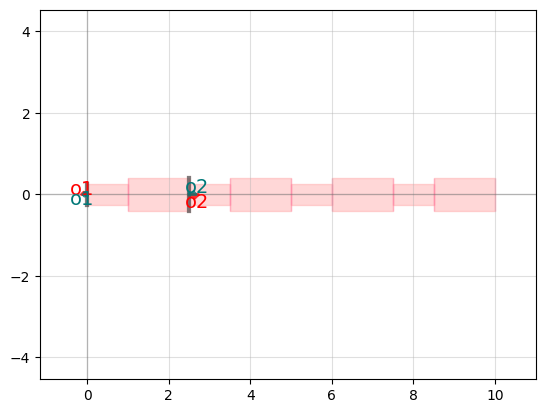

In [35]:
@gf.cell
def dbr_single(w1=0.5, w2=0.8, l1=1, l2=1.5, straight=gf.components.straight):
    c = gf.Component()
    c1 = c << straight(width=w1, length=l1)
    c2 = c << straight(width=w2, length=l2)
    c2.connect(port='o1', destination=c1.ports['o2'])
    c.add_port('o1', port=c1.ports['o1'])
    c.add_port('o2', port=c2.ports['o2'])
    return c

c = gf.Component()
c.add_array(dbr_single(), columns=4, rows=1, spacing=(2.5, 10))
c.add_ports(dbr_single().get_ports_list())
c.plot_matplotlib()

In [43]:
c

2023-06-25 09:57:01.855 | INFO     | gdsfactory.klive:show:55 - Message from klive: {"version": "0.2.2", "type": "open", "file": "C:\\Users\\lkk12\\AppData\\Local\\Temp\\gdsfactory\\layer1.gds"}


AppLayout(children=(Output(layout=Layout(grid_area='footer')), VBox(children=(Button(description='clear annota…

layer1: uid ae51306d, ports ['o1', 'e1', 'o2', 'e2'], references ['straight_heater_metal_undercut_1'], 0 polygons


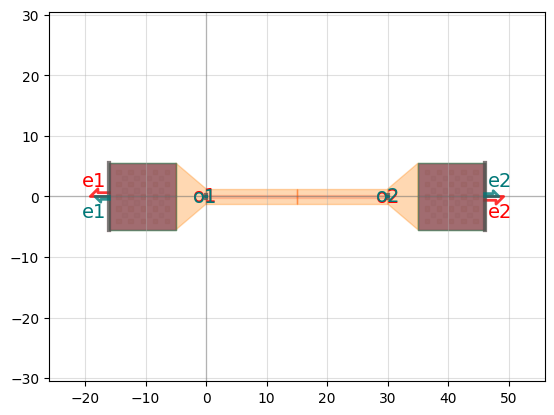

In [42]:
c = gf.Component("layer1")
bend = c << gf.components.straight_heater_metal(length=30)
c.add_ports(bend.get_ports_list())
c.plot_matplotlib()